In [2]:
import os

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [5]:
# Scaling to standard scaler
from sklearn.preprocessing import StandardScaler

In [6]:
import shap

# Read SRV-FR-SQLN-11

In [7]:
df_11 = pd.read_csv('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_Processed/SRV-FR-SQLN-11_Processed.csv')

In [8]:
# Missing Values

df_11.isnull().sum().sum()

1647653

In [9]:
# Missing Value Treatment
df_11 = df_11.set_index('Timestamp').fillna(df_11.mean())
print(df_11.isnull().sum().sum())

0


## Group of Col

In [10]:
buffer_col = [x for x in list(df_11.columns) if 'Buffer' in x] 

## data_11

In [11]:
# Copy of df_11

data_11 = df_11.copy()

In [12]:
print(data_11.index.name)
data_11.index.rename('Date_Time', inplace = True)

Timestamp


# 

In [13]:
scaler = StandardScaler()
scaler.fit(data_11.values)

StandardScaler()

In [14]:
data_11_scaled = scaler.transform(data_11.values)

In [15]:
outliers_fraction = 0.001
model_11 =  IsolationForest(random_state = 25)#contamination=outliers_fraction) 
#random_state = 24 # 161 anomaly
model_11.fit(data_11_scaled) 

IsolationForest(random_state=25)

In [16]:
pd.Series(model_11.predict(data_11_scaled)).value_counts()

 1    44958
-1      312
dtype: int64

In [17]:
print("Percentage of Anomaly : ", round(161/45270, 3)*100, "%")

Percentage of Anomaly :  0.4 %


In [18]:
data_11['Anomaly'] = pd.Series(model_11.predict(data_11_scaled), index = data_11.index)

In [19]:
# DecsionScore

data_11_anomaly_score = pd.Series(model_11.decision_function(data_11_scaled), index = data_11.index)

In [20]:
data_11['Anomaly_Score'] = data_11_anomaly_score

In [21]:
data_11.shape

(45270, 137)

In [22]:
data_11

,Total disk space on K:,Total disk space on J:,Total disk space on N:\LOGS,Total disk space on N:,"SQL Server, Locks: Lock Waits per second (Total)","SQL Server, Buffer Manager: Page reads/sec",Outgoing network traffic on vmxnet3 Ethernet Adapter-WFP Native MAC Layer LightWeight Filter-0000,"SQL Server, Locks: Number of Deadlocks/sec (Total)",Free disk space on V:,Total disk space on Q:\LOGS,...,Free disk space on R:\LOGS,Free disk space on G:,Free disk space on N:\LOGS,Free disk space on H:\LOGS,Free disk space on Q:,"SQL Server, Memory Manager: Memory Grants Pending",Free disk space on S:,"SQL Server, Cache: Cache Hit Ratio",Anomaly,Anomaly_Score
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-06-16 05:17:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1914432.0,0.0,1.661783e+10,5.365498e+09,...,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,81.8883,1,0.106113
2020-06-16 05:18:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1760608.0,0.0,1.661783e+10,5.365498e+09,...,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,87.7246,1,0.103283
2020-06-16 05:19:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1820848.0,0.0,1.661783e+10,5.365498e+09,...,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,81.2514,1,0.106393
2020-06-16 05:20:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1720624.0,0.0,1.661783e+10,5.365498e+09,...,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,86.2335,1,0.106126
2020-06-16 05:21:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,2609184.0,0.0,1.661783e+10,5.365498e+09,...,5.037883e+09,4.036710e+10,3.435790e+09,4.689887e+09,3.090481e+10,0.0,1.396507e+10,84.1061,1,0.104877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-20 01:09:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,2231720.0,0.0,6.161638e+10,5.365498e+09,...,5.037883e+09,4.018851e+10,3.210936e+09,4.689887e+09,2.738160e+10,0.0,1.396507e+10,85.7028,1,0.128097
2020-07-20 01:10:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1912752.0,0.0,1.009493e+11,5.365498e+09,...,5.037883e+09,4.018851e+10,3.210936e+09,4.689887e+09,2.738160e+10,0.0,1.396507e+10,90.9751,1,0.124052
2020-07-20 01:11:00,8.938692e+11,9.663355e+10,5.365498e+09,2.899071e+11,0.0,0.0,1684728.0,0.0,1.009493e+11,5.365498e+09,...,5.037883e+09,4.018851e+10,3.210936e+09,4.689887e+09,2.738160e+10,0.0,1.396507e+10,90.6480,1,0.132789


In [23]:
data_11[(data_11.index >= '2020-06-20 00:0:00') & (data_11.index <= '2020-06-21 00:00:00') & (data_11['Anomaly'] == -1)][buffer_col]

,"SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Target pages"
Date_Time,,,,,,,,,,,
2020-06-20 00:12:00,1040.6580,0.0,2642649.0,9.651900,0.0,148494.5635,303.2603,1491.6838,94.1072,1476.8662,65503232.0
2020-06-20 03:12:00,0.0000,0.0,2631457.0,74.637672,0.0,59637.1384,0.0000,403.6869,98.5279,0.0000,65503232.0
2020-06-20 07:12:00,0.0000,0.0,2623612.0,1.066900,0.0,51087.5918,0.0000,0.0000,86.4194,0.0000,65503232.0
2020-06-20 09:12:00,10092.5009,0.0,2617932.0,2.033700,0.0,98135.6017,26.5843,6.8921,92.2772,6.8923,65503232.0
2020-06-20 09:51:00,12118.8631,0.0,2622424.0,2.583900,0.0,155941.9701,3075.2054,62.0320,88.5861,160.4943,65503232.0
2020-06-20 09:57:00,12791.6031,0.0,2622716.0,74.637672,0.0,204551.9474,783.7398,10.8303,89.1003,28.5527,65503232.0
2020-06-20 10:01:00,11141.6753,0.0,2621521.0,7.601500,0.0,118663.5242,868.3988,17.7270,88.1179,26.5844,65503232.0
2020-06-20 10:12:00,7445.2181,0.0,2623967.0,74.637672,0.0,83014.4716,0.9846,0.9846,88.0436,23.6280,65503232.0
2020-06-20 11:12:00,0.0000,0.0,2622383.0,11.552300,0.0,160661.8359,6.8923,0.0000,96.0378,0.0000,65503232.0


# Feature importance

The sklearn.ensemble.iforest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


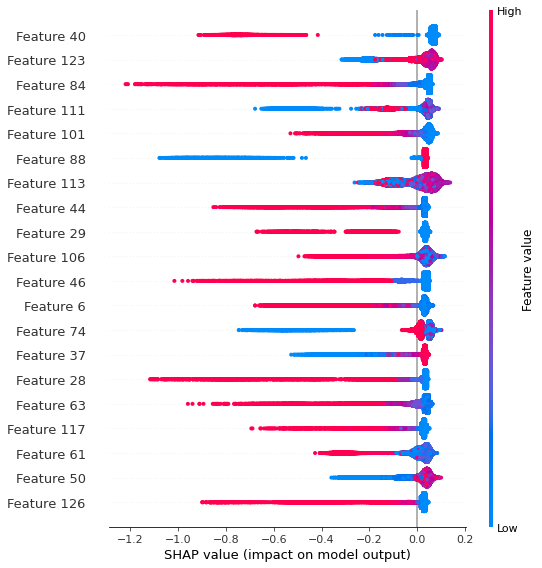

In [24]:
# Create shap values and plot them
X_explain = data_11_scaled
shap_values = shap.TreeExplainer(model_11).shap_values(X_explain)
shap.summary_plot(shap_values, X_explain)

In [25]:
data_11.columns[40]

'Free disk space on J:\\LOGS'

In [26]:
min(shap_values[0,:])

-0.8026837029985774

In [27]:
# Test with one row

In [28]:
test_row = [858990247936,96633552896,5365497856,289907081216,0,382.956,49621736,0,16313745408,5365497856,0,13668253696,46192852992,75158716416,0.0021,6954760,21471625216,0,2633911,5365497856,16557211648,30.9895,837515411456,0,0.0236,0,437956,107370971136,1.9692,0,173150208,133287.8075,10573736,7.8771,38697111552,4518313984,0,29365043200,85896134656,115.271953540369,4803395584,5365497856,22805544960,2144272384,49699752,246957408256,0.213129133679592,0,42946461696,5013569536,26715750400,42946523136,455.8682,19713687552,0,5365497856,0,0,13337.3387,27748794368,268432244736,1151.9871,27726040000,1185.4996,1.9692,3943956480,46456.2105,0,32209043456,10592360,6907756544,4852416512,29360128000,5365497856,35200958464,171795480576,1.4,56161232,1729626112,5365497856,0,96633552896,47711125504,41.3486,17.7228,4256563200,12236161024,24.6152,22274179072,1.9394,0,0.9847,5365497856,5365497856,99.9944,39409876992,5365497856,3.9382,26840334336,9.8463,891202502656,1,17070,21505114112,92226650112,65503232,0,137.8484,524283904,80527425536,1.39864826205191,46040244224,0,3555231132,106846744576,18870435840,0,0,29597584000,85896134656,1053163520,0,171795480576,12473270272,1931550720,107370971136,0,5037883392,40367095808,3435790336,4689887232,30799953920,0,13965066240,91.5377]

In [29]:
# np.array(test_row).reshape(1,135)
model_11.predict(scaler.transform(np.array(test_row).reshape(1,135)))

array([-1])

In [30]:
explainer = shap.TreeExplainer(model_11)

In [31]:
shap_values.shape

(45270, 135)

In [36]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [33]:
X_explain_test = scaler.transform(np.array(test_row).reshape(1,135))
# model_11.predict(scaler.transform(np.array(test_row).reshape(1,135)))

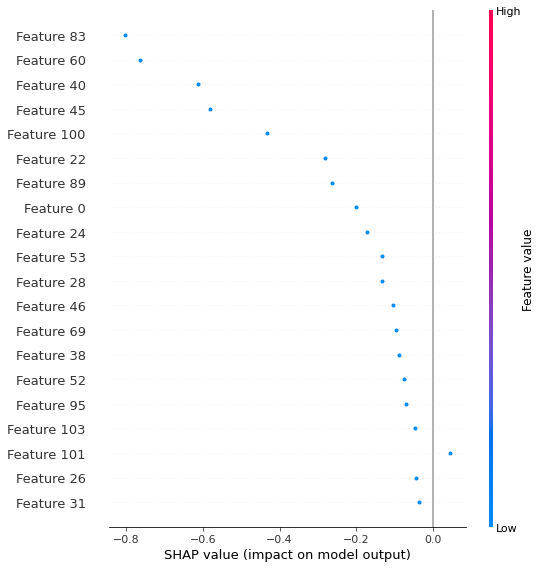

In [87]:
shap_values_test = explainer.shap_values(X_explain_test)#,check_additivity=False ) # check_additivity=False # feature_perturbation='interventional
# shap.summary_plot(shap_values, X_explain_test)

shap.summary_plot(shap_values_test, X_explain_test)

In [93]:
# shap.dependence_plot("Feature 60", shap_values_test, X_explain_test)

In [41]:
shap_values_test.shape

(1, 135)

In [78]:
shap_values_test[0][83]

-0.8027392696310567

In [79]:
np.where(shap_values_test == np.min(shap_values_test[0]))

(array([0]), array([83]))

In [62]:
shap_values_test[:,79:81]

array([[0.        , 0.02055086]])

(135,)

In [96]:
data_11.columns[[83,60,40,45,100,22]]

Index(['SQL Server, Statistics: Auto-Param Attempts/sec',
       'Total disk space on P:', 'Free disk space on J:\LOGS',
       'Total disk space on Q:', 'Total disk space on V:',
       'Total disk space on F:'],
      dtype='object')

In [95]:
np.max(shap_values_test2)

0.06170652200800937

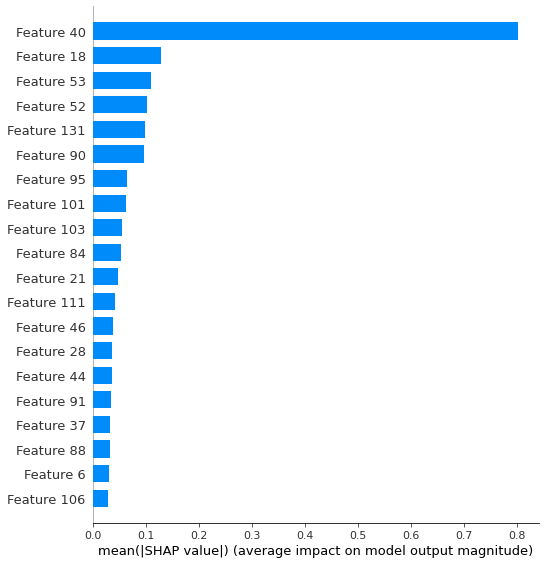

In [97]:
X_explain_test2 = data_11_scaled[0,:].reshape(1,135)
shap_values_test2 = explainer.shap_values(X_explain_test2)#,check_additivity=False ) # check_additivity=False # feature_perturbation='interventional
# shap.summary_plot(shap_values, X_explain_test)

shap.summary_plot(shap_values_test2, X_explain_test2, plot_type = 'bar')

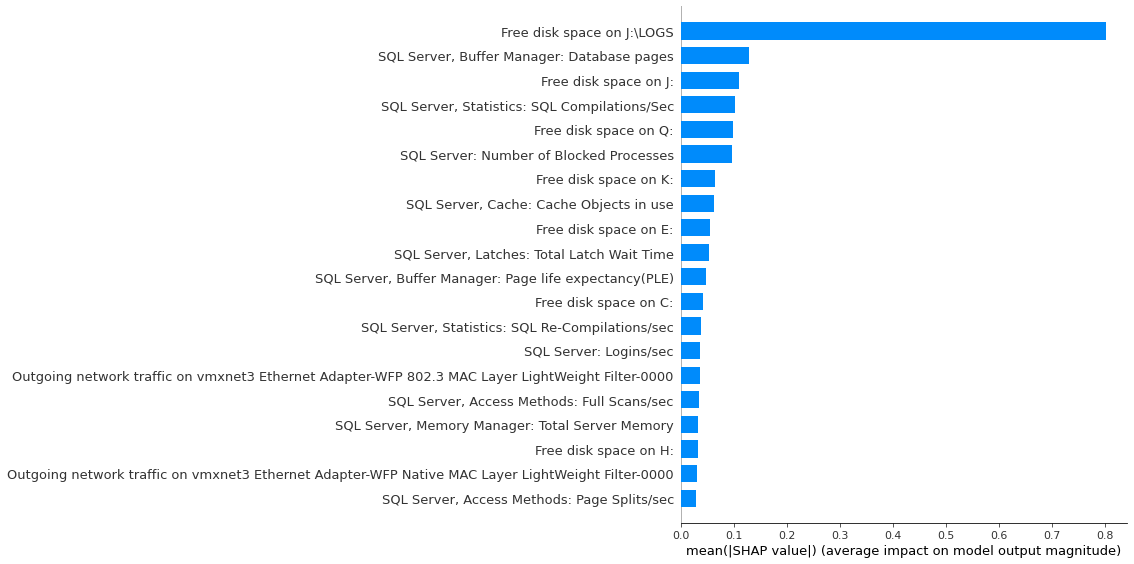

In [98]:
X_explain_test3 = pd.DataFrame(data=data_11_scaled[0,:].reshape(1,135), columns = df_11.columns)
shap_values_test3 = explainer.shap_values(X_explain_test3)#,check_additivity=False ) # check_additivity=False # feature_perturbation='interventional
# shap.summary_plot(shap_values, X_explain_test)

shap.summary_plot(shap_values_test3, X_explain_test3, plot_type = 'bar')

In [101]:
print(np.min(shap_values_test3))
print(np.min(shap_values_test2))

-0.8026837029985774
-0.8026837029985774


In [102]:
np.where(shap_values_test2 == np.min(shap_values_test2))

(array([0]), array([40]))

In [104]:
np.where(shap_values_test3 == np.min(shap_values_test3))

(array([0]), array([40]))

In [105]:
np.where(shap_values_test == np.min(shap_values_test))

(array([0]), array([83]))

In [127]:
sort_np = np.sort(shap_values_test)[0]
np.where(shap_values_test == sort_np[2])[1][0]

40

In [130]:
sort_np[0:5]

array([-0.80273927, -0.7650722 , -0.61413302, -0.58266804, -0.43246144])